In [1]:
import os
try:
    path_initialized
except NameError:
    path_initialized = True
    os.chdir('..')
    
import numpy as np
import scipy
import json
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import swiper.plot as plotter

In [2]:
def log1(d, c1, c0, a):
    return a * d**3 * (c1 * np.log(d) + c0)

def log2(d, c2, c1, c0, a):
    return a * d**3 * (c2 * np.log(d)**2 + c1 * np.log(d) + c0)

def log3(d, c3, c2, c1, c0, a):
    return a * d**3 * (c3 * np.log(d)**3 + c2 * np.log(d)**2 + c1 * np.log(d) + c0)

def poly3(d, c3, c2, c1, c0):
    return c3 * d**3 + c2 * d**2 + c1 * d + c0

In [3]:
with open('notebooks/data/fpga_data.json', 'r') as f:
    data = json.load(f)
    ds = data['ds']
    luts = data['luts']
    regs = data['regs']

/var/folders/vy/pypq_bm52_50g15jqc51yyr80000gp/T/ipykernel_38192/3695353580.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  fit_helios_luts,_ = scipy.optimize.curve_fit(poly3, ds1, helios_luts)
/var/folders/vy/pypq_bm52_50g15jqc51yyr80000gp/T/ipykernel_38192/3695353580.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  fit_helios_regs,_ = scipy.optimize.curve_fit(poly3, ds1, helios_regs)


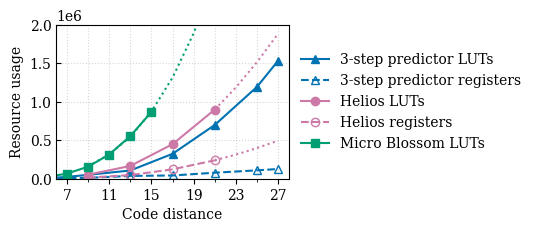

In [4]:

fig,ax = plt.subplots(figsize=(3,2))

ds1 = [9, 13, 17, 21]
helios_luts = [52111, 165718, 448314, 898715]
helios_regs = [13754, 47211, 122028, 238939]
fit_helios_luts,_ = scipy.optimize.curve_fit(poly3, ds1, helios_luts)
fit_helios_regs,_ = scipy.optimize.curve_fit(poly3, ds1, helios_regs)

ds2 = [3, 5, 7, 9, 11, 13, 15]
mb_luts = [4000, 21000, 66000, 156000, 314000, 553000, 867000]
fit_mb,_ = scipy.optimize.curve_fit(log1, ds2, mb_luts)

ds_fit = np.arange(9, 29, 2)

ax.plot(ds, luts, '^-', color='C0', label='3-step predictor LUTs')
ax.plot(ds, regs, '^--', color='C0', markerfacecolor='none', label='3-step predictor registers')
ax.plot(ds1, helios_luts, 'o-', color='C1', label='Helios LUTs')
ax.plot(ds1, helios_regs, 'o--', color='C1', markerfacecolor='none', label='Helios registers')
ax.plot(ds_fit[-4:], poly3(ds_fit[-4:], *fit_helios_luts), ':', color='C1')
ax.plot(ds_fit[-4:], poly3(ds_fit[-4:], *fit_helios_regs), ':', color='C1')
ax.plot(ds2, mb_luts, 's-', color='C2', label='Micro Blossom LUTs')
ax.plot(ds_fit, log1(ds_fit, *fit_mb), ':', color='C2')
ax.set_xlabel('Code distance')
ax.set_ylabel('Resource usage')

# legend off to right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

ax.set_ylim(0, 2e6)
ax.set_xlim(6, 28)
ax.set_xticks(range(7, 29, 4))
ax.xaxis.set_minor_locator(MultipleLocator(2, 1))

ax.grid(axis='both', alpha=0.5, zorder=-10, linestyle=':', which='both')
ax.tick_params(direction='in', axis='y')

plt.savefig('notebooks/figures/fpga.pdf', bbox_inches='tight')